# 分割数据集

In [3]:
from sklearn import datasets
iris = datasets.load_iris() # 导入数据集
X = iris.data # 获得其特征向量
y = iris.target # 获得样本label

# 分割数据集
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

# 2. 数据变换

2.1 普通标准化

In [17]:
from sklearn import preprocessing
import numpy as np

# 1. 基于mean和std的标准化
scaler = preprocessing.StandardScaler().fit(X_train)
scaler.transform(X_train)
scaler.transform(X_test)

# 2. 将每个特征值归一化到一个固定范围
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1)).fit(X_train)
scaler.transform(X_train)
scaler.transform(X_test)
#feature_range: 定义归一化范围，注用（）括起来

# 3.logistic 标准化
def logistic(X):
    return 1/(1+np.exp(-X))
logistic(X_train)
logistic(X_test)
# 3.小数点移动，手动标准化

array([[0.99592986, 0.9168273 , 0.97811873, 0.75026011],
       [0.99917558, 0.95257413, 0.99726804, 0.89090318],
       [0.99330715, 0.96083428, 0.76852478, 0.549834  ],
       [0.9950332 , 0.97587298, 0.81757448, 0.549834  ],
       [0.9945137 , 0.9836975 , 0.81757448, 0.52497919],
       [0.99954738, 0.93086158, 0.99899323, 0.90887704],
       [0.99849882, 0.95257413, 0.99698158, 0.90024951],
       [0.9939402 , 0.96442881, 0.84553473, 0.62245933],
       [0.9900482 , 0.96083428, 0.80218389, 0.549834  ],
       [0.9945137 , 0.93702664, 0.98015969, 0.80218389],
       [0.99330715, 0.97068777, 0.83201839, 0.64565631],
       [0.99260846, 0.92414182, 0.98901306, 0.84553473],
       [0.99666519, 0.98787157, 0.81757448, 0.59868766],
       [0.99183743, 0.96770454, 0.83201839, 0.549834  ],
       [0.99330715, 0.97340301, 0.80218389, 0.549834  ],
       [0.9987706 , 0.95257413, 0.9945137 , 0.90887704],
       [0.99260846, 0.97340301, 0.80218389, 0.52497919],
       [0.9939402 , 0.97811873,

### 还原 

In [16]:
# 对预测数据还原---从（0，1）反归一化到原始范围
from sklearn import preprocessing
import numpy as np

temp = scaler.transform(X_train[:5])
dataset = scaler.inverse_transform(temp)

2.2 正则化

normalize()参数：

    X : 需要正则化的特征
    norm : 设置范数，‘l1’, ‘l2’, 或者’max’, 默认是’l2’
    return_norm : boolean, 默认False，如果为True将会返回计算后的norm参数

In [11]:
# 当你想要计算两个样本的相似度时必不可少的一个操作，
# 就是正则化。其思想是：首先求出样本的p-范数，
# 然后该样本的所有元素都要除以该范数，这样最终使得每个样本的范数都为1
# 根据训练数据创建一个正则器
normalizer = preprocessing.Normalizer(norm='l2').fit(X_train)
normalizer.transform(X_train)
normalizer.transform(X_test)

array([[0.76521855, 0.33391355, 0.52869645, 0.15304371],
       [0.71491405, 0.30207636, 0.59408351, 0.21145345],
       [0.82512295, 0.52807869, 0.19802951, 0.03300492],
       [0.79837025, 0.55735281, 0.22595384, 0.03012718],
       [0.76578311, 0.60379053, 0.22089897, 0.0147266 ],
       [0.70600618, 0.2383917 , 0.63265489, 0.21088496],
       [0.68619022, 0.31670318, 0.61229281, 0.232249  ],
       [0.80597792, 0.52151512, 0.26865931, 0.07901744],
       [0.79594782, 0.55370283, 0.24224499, 0.03460643],
       [0.72460233, 0.37623583, 0.54345175, 0.19508524],
       [0.78889479, 0.55222635, 0.25244633, 0.09466737],
       [0.67054118, 0.34211284, 0.61580312, 0.23263673],
       [0.77381111, 0.59732787, 0.2036345 , 0.05430253],
       [0.786991  , 0.55745196, 0.26233033, 0.03279129],
       [0.790965  , 0.5694948 , 0.2214702 , 0.0316386 ],
       [0.72155725, 0.32308533, 0.56001458, 0.24769876],
       [0.78523221, 0.5769053 , 0.22435206, 0.01602515],
       [0.77964883, 0.58091482,

2.3 二值化–特征的二值化 与 特征编码

In [18]:
# 特征的二值化是指将数值型的特征数据转换成布尔类型的值。可以使用实用类Binarizer。
from sklearn import preprocessing
import numpy as np

# 创建一组特征数据，每一行表示一个样本，每一列表示一个特征
x = np.array([[1., -1., 2.],
              [2., 0., 0.],
              [0., 1., -1.]])

binarizer = preprocessing.Binarizer().fit(x)
binarizer.transform(x)

# 默认是根据0来二值化，大于0的都标记为1，小于等于0的都标记为0。
# 当然也可以自己设置这个阀值，只需传出参数threshold即可。

binarizer = preprocessing.Binarizer(threshold=1.5)
binarizer.transform(x)

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 0.]])

In [54]:
# one-hot 编码
from sklearn import preprocessing
import numpy as np

# 不指定取值
enc = preprocessing.OneHotEncoder()
enc.fit([[0, 0, 3], [1, 1, 0], [0, 2, 1], [1, 0, 2]])
print(enc.transform([[0,1,3]]).toarray())


[[1. 0. 0. 1. 0. 0. 0. 0. 1.]]
[[0. 1. 1. 1. 0.]]


In [ ]:
# 指定取值, 参数n_values 已被弃用
enc = preprocessing.OneHotEncoder(n_values=[2,3,4])
enc.fit([[1, 2, 3], [0, 2, 0]])
print(enc.transform([[1,2,0]]).toarray())

##  创建多项式特征 

In [ ]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

# 自建一组3*2的样本
x = np.arange(6).reshape(3, 2)

# 创建2次方的多项式
poly = PolynomialFeatures(2)

x,poly.fit_transform(x)

##  自定义函数 

In [ ]:
import numpy as np
from sklearn.preprocessing import FunctionTransformer

transformer = FunctionTransformer(np.log1p)

x = np.array([[0, 1], [2, 3]])

transformer.transform(x)

# 3.离散化

为什么要离散化：

    调高计算效率
    分类模型计算需要
    给予距离计算模型（k均值、协同过滤）中降低异常数据对模型的影响
    图像处理中的二值化处理

ps：离散化也可以用于已经离散化的数据，就是值域的重新划分，一切都是看业务需要
连续数据离散化方法：

    分位数法：使用四分位、五分位、十分位等进行离散
    距离区间法：等距区间或自定义区间进行离散，有点是灵活，保持原有数据分布
    频率区间法：根据数据的频率分布进行排序，然后按照频率进行离散，好处是数据变为均匀分布，但是会更改原有的数据结构
    聚类法：使用k-means将样本进行离散处理
    卡方：通过使用基于卡方的离散方法，找出数据的最佳临近区间并合并，形成较大的区间
    二值化：数据跟阈值比较，大于阈值设置为某一固定值（例如1），小于设置为另一值（例如0），然后得到一个只拥有两个值域的二值化数据集。

ps：卡方检验就是统计样本的实际观测值与理论推断值之间的偏离程度，实际观测值与理论推断值之间的偏离程度就决定卡方值的大小，卡方值越大，越不符合；卡方值越小，偏差越小，越趋于符合，若两个值完全相等时，卡方值就为0，表明理论值完全符合。

In [44]:
import pandas as pd
stock = pd.read_csv('D://data/dataset/stock.csv')
stock.head()

,Unnamed: 0,ts_code,trade_date,close,open,high,low,pre_close,change,pct_chg,vol,amount
0,0,000001.SH,20180813,2785.8720,2769.0166,2789.7983,2742.5599,2795.3099,-9.4379,-0.3376,127532241.0,129460540.4
1,1,000001.SH,20180814,2780.9646,2780.7357,2789.4437,2766.5693,2785.8720,-4.9074,-0.1762,109571077.0,112465397.0
2,2,000001.SH,20180815,2723.2576,2777.2493,2777.7032,2721.2404,2780.9646,-57.7070,-2.0751,116161787.0,118707674.1
3,3,000001.SH,20180816,2705.1917,2691.4260,2732.9489,2672.7407,2723.2576,-18.0659,-0.6634,120277878.0,117580995.0
4,4,000001.SH,20180817,2668.9660,2723.8871,2730.3326,2665.5918,2705.1917,-36.2257,-1.3391,112445294.0,115499397.0


In [50]:
#######等距离散#######
import pandas as pd
import numpy as np

train = stock.iloc[:, 3:5]

train['close'] = pd.cut(train['close'], 4, labels=range(4))
# 若没有labels 属性，则出现区间
train.head()

,close,open
0,1,2769.0166
1,1,2780.7357
2,1,2777.2493
3,0,2691.4260
4,0,2723.8871


In [51]:
#####等频率离散#######
# 设置离散区间数
k =4

# 获取数据
train = stock.iloc[:, 3:5]

# 设置频率范围
w = [1.0*i/k for i in range(k+1)]

# 使用describe获取频率区域的分界点
w = np.array(train['close'].describe(percentiles = w)[4:4+k+1])
w[0] = w[0]*(1-1e-10)

# 根据分界点进行数据离散处理
train['close'] = pd.cut(train['close'], w, labels = range(k))
train

,close,open
0,1,2769.0166
1,1,2780.7357
2,0,2777.2493
3,0,2691.4260
4,0,2723.8871
...,...,...
480,3,3363.3324
481,3,3380.7621
482,3,3370.5878
483,3,3341.5276


In [55]:
#####使用聚类实现离散化#######
# 数据准备 # 改变数据形状
train = stock.iloc[:, 3:5]

# 创建k-means模型并指定聚类数量
from sklearn.cluster import KMeans
km_model = KMeans(n_clusters=4, random_state=2018)

# 模型导入数据
train_re = np.array(train['close']).reshape(-1, 1)
result = km_model.fit_predict(train_re)

# 离散数据并入原数据
train['close'] = result

train.groupby('close').count()

,open
close,
0,179
1,116
2,45
3,145


In [67]:
#####数据二值化######
import numpy as np
from sklearn import preprocessing 

# 建立模型 根据平均值作为阈值
train = stock.iloc[:, 3:5]
binarizer_scaler = preprocessing.Binarizer(threshold=train['close'].mean())

# 二值化处理
train_re = np.array(train['close']).reshape(-1, 1)
result = binarizer_scaler.fit_transform(train_re)

# 数据合并
train['close'] = result

train.groupby('close').count()

,open
close,
0.0,215
1.0,270


# 卡方离散化

# 4.缺失值填充

缺失值类型

缺失值从缺失的分布来讲可以分为完全随机缺失，随机缺失和完全非随机缺失。

    完全随机缺失（missing completely at random,MCAR）指的是数据的缺失是随机的，数据的缺失不依赖于任何不完全变量或完全变量。
    随机缺失(missing at random,MAR)指的是数据的缺失不是完全随机的，即该类数据的缺失依赖于其他完全变量。
    完全非随机缺失(missing not at random,MNAR)指的是数据的缺失依赖于不完全变量自身。

从缺失值的所属属性上讲，

    如果所有的缺失值都是同一属性，那么这种缺失成为单值缺失，
    如果缺失值属于不同的属性，称为任意缺失。
    另外对于时间序列类的数据，可能存在随着时间的缺失，这种缺失称为单调缺失。

处理方法

    当缺失比例很小时，可直接对缺失记录进行舍弃或进行手工处理。但在实际数据中，往往缺失数据占有相当的比重。这时如果手工处理非常低效，如果舍弃缺失记录，则会丢失大量信息，使不完全观测数据与完全观测数据间产生系统差异，对这样的数据进行分析，你很可能会得出错误的结论。有时数据颇有价值，数据集中某个条目缺失，导致一个特征无效时，扔掉和重新获取数据集都是不可取的，所以必须采用一些方法来解决这个问题。
    从总体上来说分为删除存在缺失值的个案和缺失值插补。对于主观数据，人将影响数据的真实性，存在缺失值的样本的其他属性的真实值不能保证，那么依赖于这些属性值的插补也是不可靠的，所以对于主观数据一般不推荐插补的方法。插补主要是针对客观数据，它的可靠性有保证。

简单列举几点处理方法：
    
    （1）使用可用特征的 均值 来填补缺失值；
    （2）使用 特征值 来填补缺失值，如-1；
    （3） 忽略 有缺失值的样本；
    （4）使用 相似样本的均值 填补缺少值；
    （5）使用另外的 机器学习算法预测 缺失值。

详细如下：
    
    1.删除含有缺失值的个案

主要有简单删除法和权重法。简单删除法是对缺失值进行处理的最原始方法。它将存在缺失值的个案删除。如果数据缺失问题可以通过简单的删除小部分样本来达到目标，那么这个方法是最有效的。这个方法有很大的局限性。它以减少历史数据来换取信息的完备，会丢弃大量隐藏在这些对象中的信息。在初始数据集包含的对象很少的情况下，删除少量对象足以严重影响信息的客观性和结果的正确性；因此，当缺失数据所占比例较大，特别当遗漏数据非随机分布时，这种方法可能导致数据发生偏离，从而引出错误的结论。
当缺失值的类型为非完全随机缺失的时候，可以通过对完整的数据加权来减小偏差。把数据不完全的个案标记后，将完整的数据个案赋予不同的权重，个案的权重可以通过logistic或probit回归求得。如果解释变量中存在对权重估计起决定行因素的变量，那么这种方法可以有效减小偏差。如果解释变量和权重并不相关，它并不能减小偏差。对于存在多个属性缺失的情况，就需要对不同属性的缺失组合赋不同的权重，这将大大增加计算的难度，降低预测的准确性，这时权重法并不理想。

    2.可能值插补缺失值

它的思想来源是以最可能的值来插补缺失值比全部删除不完全样本所产生的信息丢失要少。在数据挖掘中，面对的通常是大型的数据库，它的属性有几十个甚至几百个，因为一个属性值的缺失而放弃大量的其他属性值，这种删除是对信息的极大浪费，所以产生了以可能值对缺失值进行插补的思想与方法。常用的有如下几种方法。

    (1)均值插补
数据的属性分为定距型和非定距型。如果缺失值是定距型的，就以该属性存在值的平均值来插补缺失的值；如果缺失值是非定距型的，就根据统计学中的众数原理，用该属性的众数(即出现频率最高的值)来补齐缺失的值。

    (2)利用同类均值插补
同均值插补的方法都属于单值插补，不同的是，它用层次聚类模型预测缺失变量的类型，再以该类型的均值插补。假设X=(X1,X2…Xp)为信息完全的变量，Y为存在缺失值的变量，那么首先对X或其子集行聚类，然后按缺失个案所属类来插补不同类的均值。如果在以后统计分析中还需以引入的解释变量和Y做分析，那么这种插补方法将在模型中引入自相关，给分析造成障碍。

    (3)极大似然估计（Max Likelihood ,ML）
在缺失类型为随机缺失的条件下，假设模型对于完整的样本是正确的，那么通过观测数据的边际分布可以对未知参数进行极大似然估计（Little and Rubin）。这种方法也被称为忽略缺失值的极大似然估计，对于极大似然的参数估计实际中常采用的计算方法是期望值最大化(Expectation Maximization，EM）。该方法比删除个案和单值插补更有吸引力，它一个重要前提：适用于大样本。有效样本的数量足够以保证ML估计值是渐近无偏的并服从正态分布。但是这种方法可能会陷入局部极值，收敛速度也不是很快，并且计算很复杂。

    (4)多重插补（Multiple Imputation，MI）
多值插补的思想来源于贝叶斯估计，认为待插补的值是随机的，它的值来自于已观测到的值。具体实践上通常是估计出待插补的值，然后再加上不同的噪声，形成多组可选插补值。根据某种选择依据，选取最合适的插补值。

多重插补方法分为三个步骤：①为每个空值产生一套可能的插补值，这些值反映了无响应模型的不确定性；每个值都可以被用来插补数据集中的缺失值，产生若干个完整数据集合。②每个插补数据集合都用针对完整数据集的统计方法进行统计分析。③对来自各个插补数据集的结果，根据评分函数进行选择，产生最终的插补值。

假设一组数据，包括三个变量Y1，Y2，Y3，它们的联合分布为正态分布，将这组数据处理成三组，A组保持原始数据，B组仅缺失Y3，C组缺失Y1和Y2。在多值插补时，对A组将不进行任何处理，对B组产生Y3的一组估计值（作Y3关于Y1，Y2的回归），对C组作产生Y1和Y2的一组成对估计值（作Y1，Y2关于Y3的回归）。

当用多值插补时，对A组将不进行处理，对B、C组将完整的样本随机抽取形成为m组（m为可选择的m组插补值），每组个案数只要能够有效估计参数就可以了。对存在缺失值的属性的分布作出估计，然后基于这m组观测值，对于这m组样本分别产生关于参数的m组估计值，给出相应的预测即，这时采用的估计方法为极大似然法，在计算机中具体的实现算法为期望最大化法（EM）。对B组估计出一组Y3的值，对C将利用 Y1,Y2,Y3它们的联合分布为正态分布这一前提，估计出一组(Y1，Y2）。

上例中假定了Y1,Y2,Y3的联合分布为正态分布。这个假设是人为的，但是已经通过验证（Graham和Schafer于1999），非正态联合分布的变量，在这个假定下仍然可以估计到很接近真实值的结果。

多重插补和贝叶斯估计的思想是一致的，但是多重插补弥补了贝叶斯估计的几个不足。

(1)贝叶斯估计以极大似然的方法估计，极大似然的方法要求模型的形式必须准确，如果参数形式不正确，将得到错误得结论，即先验分布将影响后验分布的准确性。而多重插补所依据的是大样本渐近完整的数据的理论，在数据挖掘中的数据量都很大，先验分布将极小的影响结果，所以先验分布的对结果的影响不大。

(2)贝叶斯估计仅要求知道未知参数的先验分布，没有利用与参数的关系。而多重插补对参数的联合分布作出了估计，利用了参数间的相互关系。

以上四种插补方法，对于缺失值的类型为随机缺失的插补有很好的效果。两种均值插补方法是最容易实现的，也是以前人们经常使用的，但是它对样本存在极大的干扰，尤其是当插补后的值作为解释变量进行回归时，参数的估计值与真实值的偏差很大。相比较而言，极大似然估计和多重插补是两种比较好的插补方法，与多重插补对比，极大似然缺少不确定成分，所以越来越多的人倾向于使用多值插补方法。

1 单变量插补

    sklearn提供了单变量插补的工具类SimpleImputer ，其提供了计算缺失值的基本策略。缺失值可以用提供的常数值计算，也可以使用缺失值所在的行/列中的统计数据(平均值、中位数或者众数)来计算。这个类也支持不同的缺失值编码。

1.1 SimpleImputer类

    在版本0.20之前，请使用Imputer 类，版本0.22(包含0.22)之后的，则使用SimpleImputer

In [ ]:
def __init__(self, missing_values=np.nan, strategy="mean",
                 fill_value=None, verbose=0, copy=True, add_indicator=False):

参数说明：

    missing_values ：指定何种占位符表示缺失值，可选 number ，string ，np.nan(default) ，None
    strategy ：插补策略，字符串，默认"mean"
        "mean" ：使用每列的平均值替换缺失值，只能与数字数据一起使用
        "median"：则使用每列的中位数替换缺失值，只能与数字数据一起使用
        "most_frequent" ：则使用每列中最常用的值替换缺失值，可以与字符串或数字数据一起使用
        "constant" ：则用 fill_value 替换缺失值。可以与字符串或数字数据一起使用
    fill_value ：字符串或数值，默认"None"，当strategy ==“constant”时，fill_value用于替换所有出现的missing_values。如果保留默认值，则在输入数字数据时fill_value将为0，对于字符串或对象数据类型则为“missing_value”。
    verbose ：整数，默认为0，可选的参数，控制imputer的详细程度
    copy ：略
    add_indicator ：可选，布尔值类型，默认为False。如果为True，则 MissingIndicator 变换将堆叠到imputer的变换的输出上。这允许预测估计器尽管插补而解释缺失。如果某个要素在拟合/训练时没有缺失值，即使在变换/测试时缺少值，该要素也不会出现在缺失的指示符上。

属性说明

    statistics_ ：每一个样本的插补值
    indicator_ ：指示用于为缺失值添加二进制指标
    
SimpleImputer 类在fit过程中将会保存状态。

In [139]:
from sklearn.experimental import enable_iterative_imputer  # 无此行报错
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy= "mean" )
#imp = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value = 10)
# "mean", "median", "most_frequent", or "constant"

train = [[1, 2], [np.nan, 3], [7, 6]]
imp.fit(train)
print(train, '\n', imp.transform(train), '\n')

test = [[np.nan, 2], [6, np.nan], [7, 6]]
print(test, '\n', imp.transform(test))

[[1, 2], [nan, 3], [7, 6]] 
 [[1. 2.]
 [4. 3.]
 [7. 6.]] 

[[nan, 2], [6, nan], [7, 6]] 
 [[4.         2.        ]
 [6.         3.66666667]
 [7.         6.        ]]


当使用 'most_frequent' 或 'constant' 策略时，SimpleImputer 类还支持以 string values 或 pandas categoricals 表示的分类数据(categorical data)

In [134]:
import pandas as pd
df = pd.DataFrame([["a", "x"], [np.nan, "y"], ["a", np.nan], ["b", "y"]], dtype="category")
imp = SimpleImputer(strategy="most_frequent")
print(imp.fit_transform(df))

[['a' 'x']
 ['a' 'y']
 ['a' 'y']
 ['b' 'y']]


### 替换0元素 

In [142]:
import scipy.sparse as sp

# 创建一个稀疏矩阵
x = sp.csc_matrix([[1, 2], [0, 3], [7, 6]])

imp = SimpleImputer(missing_values=0, strategy='mean', verbose=0)
imp.fit(x.toarray())
print(x.toarray(), '\n',imp.transform(x.toarray()),'\n' )

x_test = sp.csc_matrix([[0, 2], [6, 0], [7, 6]])
print(x_test.toarray(), '\n', imp.transform(x_test.toarray()))

[[1 2]
 [0 3]
 [7 6]] 
 [[1. 2.]
 [4. 3.]
 [7. 6.]] 

[[0 2]
 [6 0]
 [7 6]] 
 [[4.         2.        ]
 [6.         3.66666667]
 [7.         6.        ]]


# 2 多变量插补

2.1 IterativeImputer类

    IterativeImputer类的功能是，将每个缺失值的特征建模为其他特征的函数，并使用该估计值进行估算。

    它以循环迭代方式实现：在每个步骤中，将特征目标列指定为输出y，将其他列视为输入X。使用一个回归器来在已知（未缺失）ｙ的样本上对（Ｘ，ｙ）进行拟合。然后使用这个回归器来预测缺失的ｙ值。这是以迭代的方式对每个特征进行的，然后重复max_iter轮。最后一轮的计算结果被返回。

In [ ]:
def __init__(self, estimator=None, missing_values=np.nan, sample_posterior=False,
             max_iter=10, tol=1e-3, n_nearest_features=None, initial_strategy="mean", 
             imputation_order='ascending', min_value=None, max_value=None, verbose=0, 
             random_state=None, add_indicator=False):

参数说明

    estimator ：estimator对象，默认= BayesianRidge()。循环法插补的每一步使用的估算器。如果sample_posterior为True，则估算器必须支持 return_std其predict方法。
    missing_values ：指定何种占位符表示缺失值，可选 number ，string ，np.nan(default) ，None
    sample_posterior ：布尔值，默认为False，是否从每个插补的拟合估计的（高斯）预测后验进行采样。如果设置为True，Estimator 必须支持return_std 其predict 方法。True如果IterativeImputer用于多个插补，则设置为 。
    max_iter ：输入为int型数据，默认值是10。在返回最后一轮计算的估算值之前要执行的最大插补轮次数。
    tol ：容忍停止条件
    n_nearest_features ：用于估计每个要素列的缺失值的其他要素数。使用每个特征对之间的绝对相关系数（在初始插补之后）测量特征之间的接近度。为了确保在整个插补过程中覆盖特征，邻居特征不一定是最接近的，而是以与每个插补目标特征的相关性成比例的概率绘制。当功能数量巨大时，可以提供显着的加速。如果None，将使用所有功能。
    initial_strategy ：使用哪种策略初始化缺失值。与 SimpleImputer 中的strategy参数相同
    imputation_order ：排序规则
        ascending ：从缺失值最少的功能到最多
        descending ：从具有最多缺失值的功能到最少
        roman ：左到右
        arabic ：右到左
        random ：随机顺序
    min_value ：最小可能的估算值。默认值None将最小值设置为负无穷大。
    max_value ：最大可能的估算值。默认值None将最大值设置为正无穷大。
    verbose ：详细程度标志控制在评估函数时发出的调试消息。越高越详细。可以是0,1或2。
    random_state ：伪随机数生成器的种子使用。如果 n_nearest_features不是None，imputation_order则随机选择估计器特征， if random和后验if的采样sample_posterior为True。
    add_indicator ：如果为True，则MissingIndicator变换将堆叠到imputer的变换的输出上。这允许预测估计器尽管插补而解释缺失。如果某个要素在拟合/训练时没有缺失值，即使在变换/测试时缺少值，该要素也不会出现在缺失的指示符上。

In [69]:
from sklearn.experimental import enable_iterative_imputer  # 无此行报错
from sklearn.impute import IterativeImputer

In [148]:
imp_mean = IterativeImputer(max_iter=10, initial_strategy="mean", random_state=0)
# 注意这只是初始的填补，有可能最终收敛相同
# "mean", "median", "most_frequent", or "constant" 


train = [[1, 2], [3, 6], [4, 8], [np.nan, 3], [7, np.nan]]
imp_mean.fit(train)
print(train,'\n', imp_mean.transform(train),'\n')

test = [[np.nan, 2], [6, np.nan], [np.nan, 6]]
print(test,'\n', imp_mean.transform(test))

[[1, 2], [3, 6], [4, 8], [nan, 3], [7, nan]] 
 [[ 1.          2.        ]
 [ 3.          6.        ]
 [ 4.          8.        ]
 [ 1.50004509  3.        ]
 [ 7.         14.00004135]] 

[[nan, 2], [6, nan], [nan, 6]] 
 [[ 1.00007297  2.        ]
 [ 6.         12.00002754]
 [ 2.99996145  6.        ]]


## 3 标记缺失值 

MissingIndicator 转换器用于将数据集转换为相应的二进制矩阵，以指示数据集中缺失值的存在。这个变换与归算结合起来是有用的。当使用插补时，保存关于哪些值丢失的信息可以提供有用的信息。

In [ ]:
def __init__(self, missing_values=np.nan, features="missing-only",
                 sparse="auto", error_on_new=True):

参数说明

    missing_values ：指定何种占位符表示缺失值，可选 number ，string ，np.nan(default) ，None
    features ：植入掩模是否应代表全部或部分特征。
        “missing-only” (default)：在fit时返回包含缺失值的特征的输入掩码
        “all”：回所有特征，无论它们是否包含缺失的值
    sparse ：返回的标记矩阵是否是稀疏
        auto：则imputer mask将与输入类型相同
        True：则imputer mask将是稀疏
        False：则imputer mask将是一个numpy数组
    error_on_new ：布尔值，如果为True（默认值），当变换中不含有缺少缺少值的要素时，transform将引发错误。这仅适用于features="missing-only"。

In [146]:
from sklearn.experimental import enable_iterative_imputer  # 无此行报错
from sklearn.impute import MissingIndicator

X = [[-1, 2], [6, -1], [7, 6]]
indicator = MissingIndicator(missing_values=-1, sparse = True)
mask_missing_values_only = indicator.fit_transform(X)
print(mask_missing_values_only)

  (0, 0)	True
  (1, 1)	True


# 4.Multiple Imputation(多重插补)

MICE模块允许大多数Statsmodels模型拟合独立和/或因变量上具有缺失值的数据集，并为拟合参数提供严格的标准误差。基本思想是将具有缺失值的每个变量视为回归中的因变量，其中一些或所有剩余变量作为其预测变量。MICE程序循环遍历这些模型，依次拟合每个模型，然后使用称为“预测平均匹配”（PMM）的过程从拟合模型确定的预测分布中生成随机抽取。这些随机抽取成为一个插补数据集的估算值。

默认情况下，每个具有缺失变量的变量都使用线性回归建模，拟合数据集中的所有其他变量。请注意，即使插补模型是线性的，PMM过程也会保留每个变量的域。因此，例如，如果给定变量的所有观测值都是正，则变量的所有估算值将始终为正。用户还可以选择指定使用哪个模型为每个变量生成插补值。

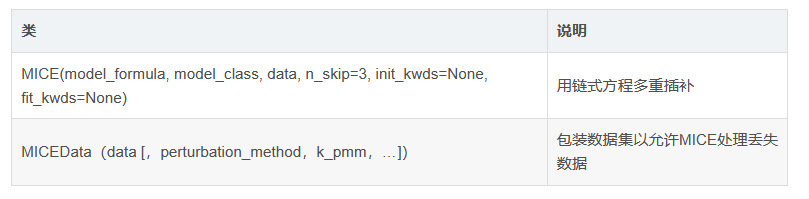

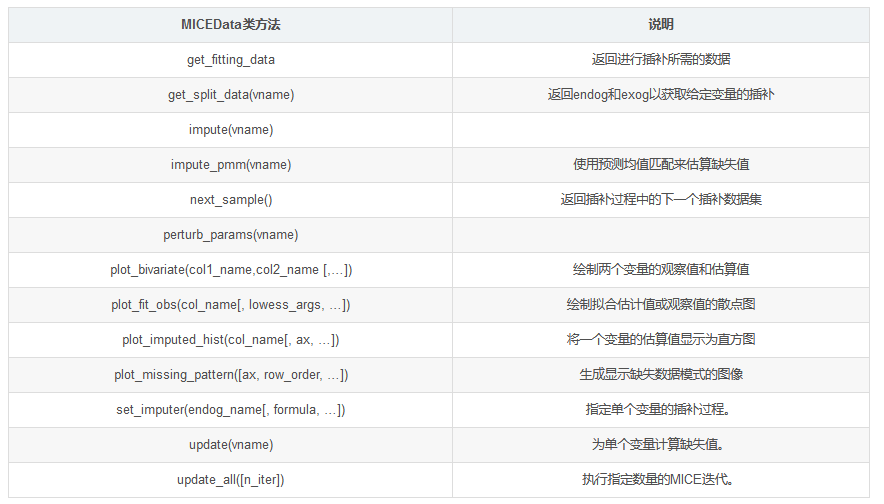

In [1]:
from statsmodels.imputation import mice

imp = mice.MICEData(data)
fml = 'y ~ x1 + x2 + x3 + x4'
mice = mice.MICE(fml, sm.OLS, imp)
results = mice.fit(10, 10)
print(results.summary())

ModuleNotFoundError: No module named 'statsmodels'

In [ ]:
#获得一系列拟合分析模型，无需合并即可获得摘要：
imp = mice.MICEData(data)
fml = 'y ~ x1 + x2 + x3 + x4'
mice = mice.MICE(fml, sm.OLS, imp)
results = []
for k in range(10):
    x = mice.next_sample()
    results.append(x)

In [70]:
pip install statsmodels

ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\asus\Anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 425, in _error_catcher
    yield
  File "C:\Users\asus\Anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 507, in read
    data = self._fp.read(amt) if not fp_closed else b""
  File "C:\Users\asus\Anaconda3\lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 62, in read
    data = self.__fp.read(amt)
  File "C:\Users\asus\Anaconda3\lib\http\client.py", line 457, in read
    n = self.readinto(b)
  File "C:\Users\asus\Anaconda3\lib\http\client.py", line 501, in readinto
    n = self.fp.readinto(b)
  File "C:\Users\asus\Anaconda3\lib\socket.py", line 589, in readinto
    return self._sock.recv_into(b)
  File "C:\Users\asus\Anaconda3\lib\ssl.py", line 1071, in recv_into
    return self.read(nbytes, buffer)
  File "C:\Users\asus\Anaconda3\lib\ssl.py", line 929, in read
    return self._sslobj.read(len, buffer)
socket.timeo


  File "C:\Users\asus\Anaconda3\lib\site-packages\pip\_internal\operations\prepare.py", line 130, in get_http_url
    link, downloader, temp_dir.path, hashes
  File "C:\Users\asus\Anaconda3\lib\site-packages\pip\_internal\operations\prepare.py", line 281, in _download_http_url
    for chunk in download.chunks:
  File "C:\Users\asus\Anaconda3\lib\site-packages\pip\_internal\cli\progress_bars.py", line 166, in iter
    for x in it:
  File "C:\Users\asus\Anaconda3\lib\site-packages\pip\_internal\network\utils.py", line 39, in response_chunks
    decode_content=False,
  File "C:\Users\asus\Anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 564, in stream
    data = self.read(amt=amt, decode_content=decode_content)
  File "C:\Users\asus\Anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 529, in read
    raise IncompleteRead(self._fp_bytes_read, self.length_remaining)
  File "C:\Users\asus\Anaconda3\lib\contextlib.py", line 130, in __exit__
    self.gen.throw